In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

plt.rcParams['font.family']=['Songti SC']
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 200

# np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=100, suppress=True)

In [6]:
def plot_line(data1,name,type='label'):
    plt.figure(figsize=(20,5))
    plt.plot(data1['timestamp'],data1['value'],'k',alpha=0.2,linewidth=2)

    plt.scatter(data1[data1[type]=='0']['timestamp'],data1[data1[type]=='0']['value'],c='g',marker='.',alpha=0.4)
    plt.scatter(data1[data1[type]=='1']['timestamp'],data1[data1[type]=='1']['value'],c='r',marker='.',alpha=0.4)

    plt.ylabel('value')
    plt.xlabel('timestamp')
    plt.title(name)

    plt.grid(True)
    plt.savefig(f'../result/pics/{name}.png',dpi=200,bbox_inches='tight')
    plt.show()

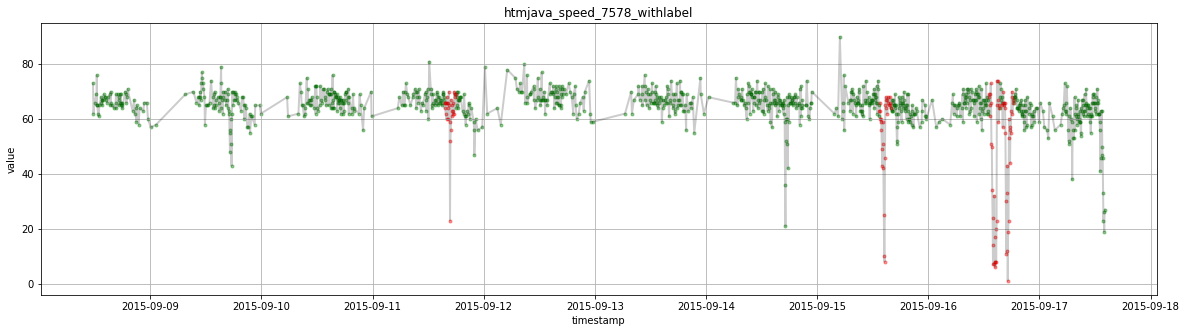

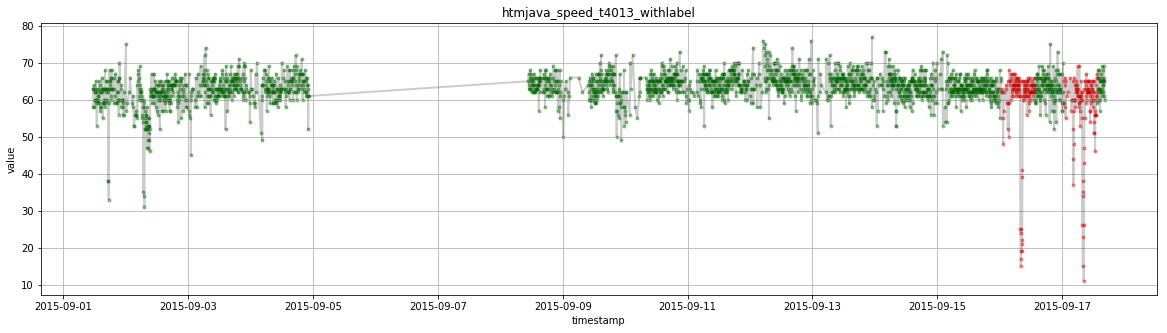

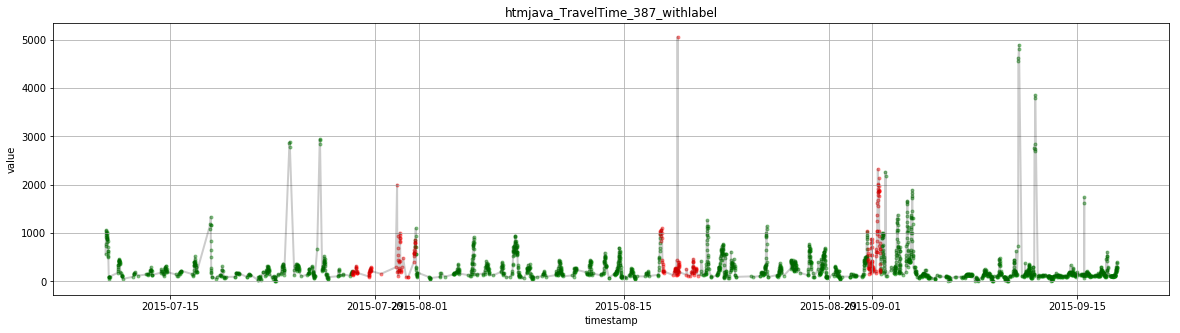

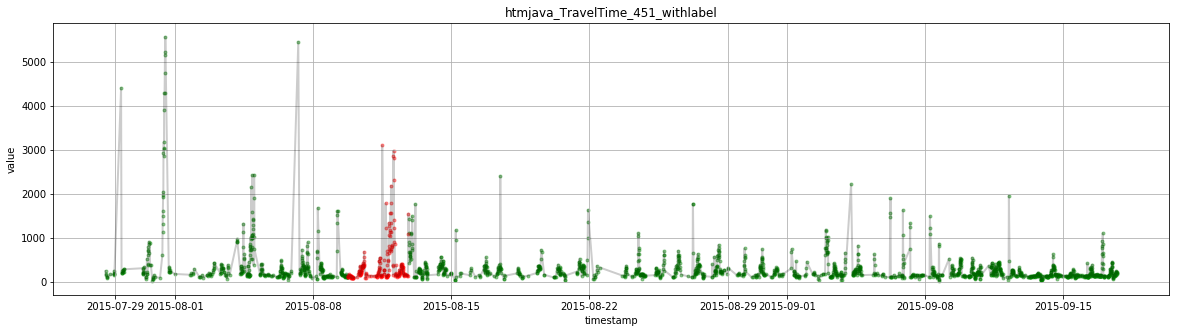

In [7]:
names = ['htmjava_speed_7578_withlabel','htmjava_speed_t4013_withlabel','htmjava_TravelTime_387_withlabel','htmjava_TravelTime_451_withlabel']

for name in names:
    data = pd.read_csv(f"../data/{name}.csv",usecols=[1,2,3],dtype={'label':'category','value':'int'},parse_dates=['timestamp'])
    plot_line(data,name,'label')

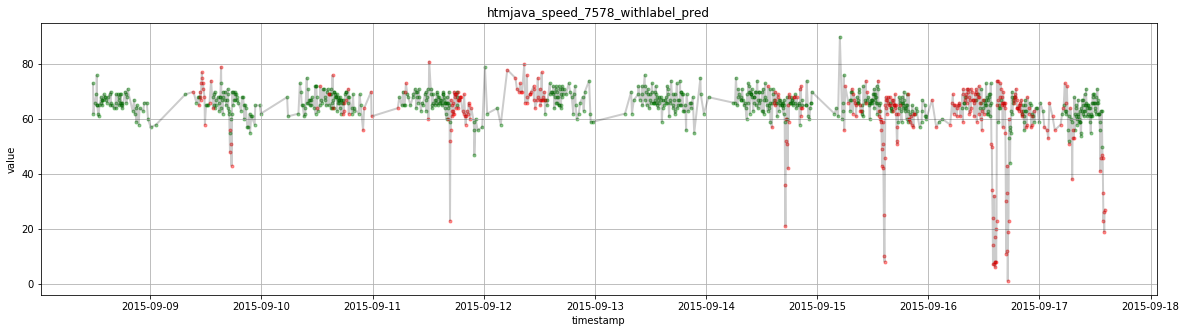

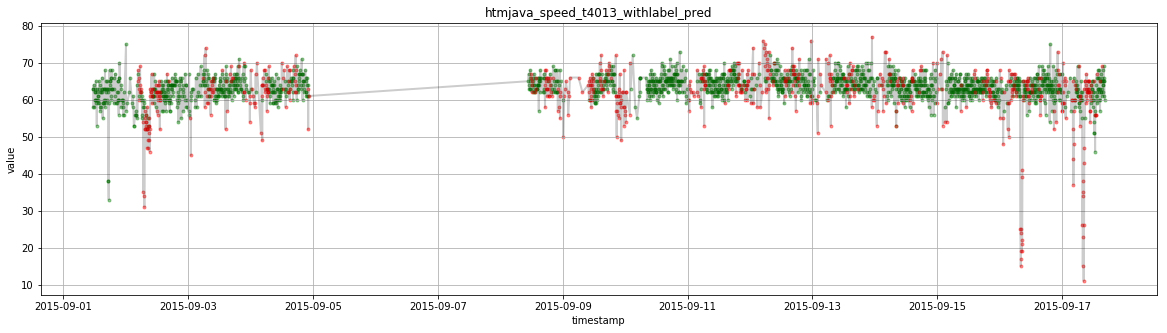

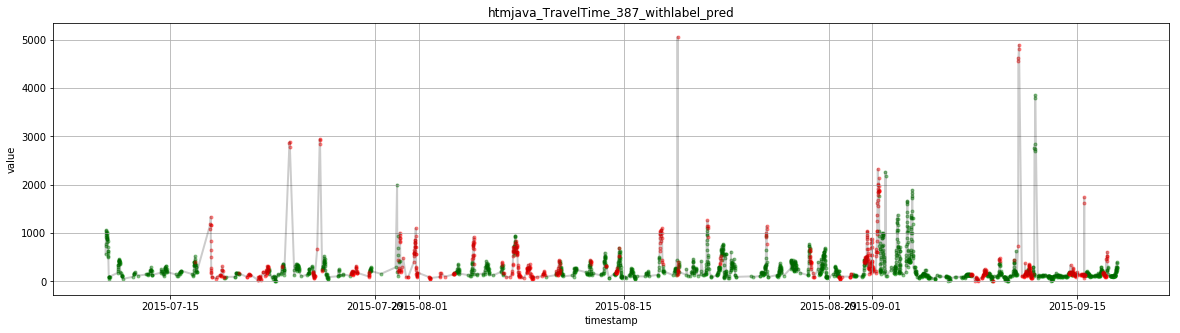

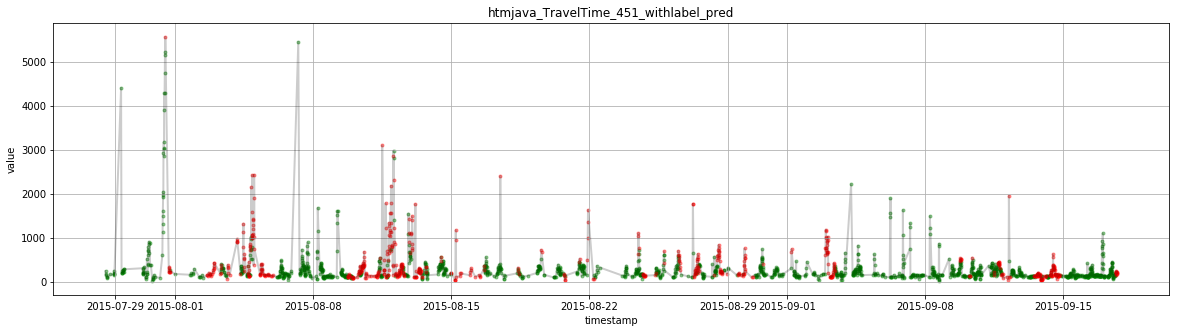

In [33]:
r_names = list(x+"_pred" for x in names)

for name in r_names:
    data = pd.read_csv(f"../result/{name}.csv",dtype={'pre_label':'category','value':'int'},parse_dates=['timestamp'])
    plot_line(data,name,'pre_label')

/Users/oak/ancd/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """


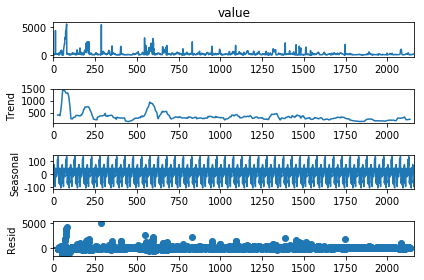

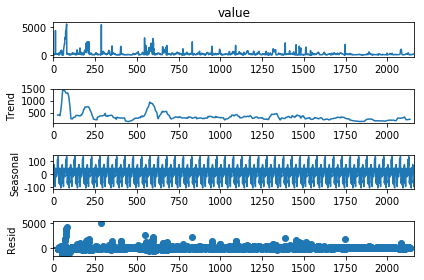

In [51]:
freqs = {0:110,1:140,2:15,3:50}
csv_i = 3
from statsmodels.tsa.seasonal import seasonal_decompose
data = pd.read_csv(f"../data/{names[csv_i]}.csv",usecols=[1,2,3],dtype={'label':'category','value':'int'},parse_dates=['timestamp'])
decomposition = seasonal_decompose(data['value'], freq=freqs[csv_i])
decomposition.plot()

In [52]:
# 时间序列稳定化测试方法
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,windows):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=windows).mean()
    rolstd = timeseries.rolling(window=windows).std()
 
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

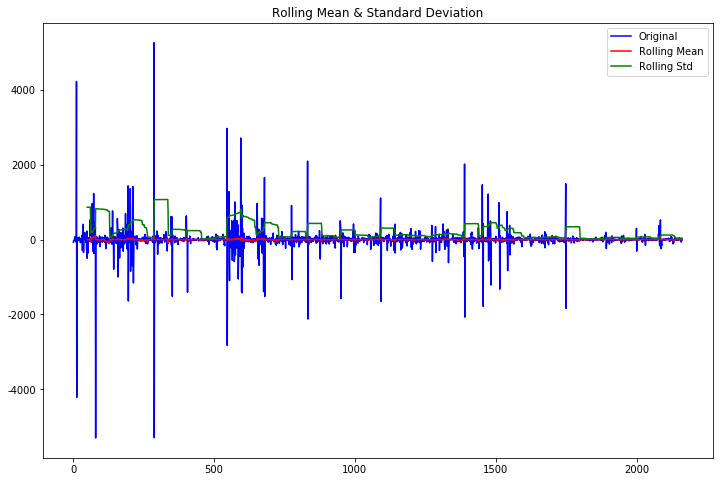

Results of Dickey-Fuller Test:
Test Statistic                 -13.835
p-value                          0.000
#Lags Used                      26.000
Number of Observations Used   2134.000
Critical Value (1%)             -3.433
Critical Value (5%)             -2.863
Critical Value (10%)            -2.567
dtype: float64


In [53]:
# P-value小于了0.05，并且Test Statistic的值远远小于Critical Value (5%)的值
test_stationarity(data['value'].diff(1).dropna(inplace=False),freqs[csv_i])